Especialização em Inteligência Artificial<br>
Lista de Exercícios 02 de Análise e Previsão de Séries Temporais<br>
Prof. Carlos Severiano<br>
Aluno: Fernando dos Santos Alves Fernandes

In [11]:
# Importando das bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
import locale
from random import gauss, randrange, random
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.regression.linear_model as rlm

rcParams['figure.figsize'] = 15, 6
locale.setlocale(locale.LC_ALL, '')
formato = "%d-%m-%Y"

1.	A série ilustrada abaixo, feita pelo IBGE, demonstra o volume de vendas mensal no Brasil. Ela está disponível no arquivo vendas_brasil.csv, em anexo a esta atividade, e também pode ser obtida em diferentes formatos no endereço: https://www.ibge.gov.br/estatisticas/economicas/comercio/9227-pesquisa-mensal-de-comercio.html?=&t=series-historicas

In [12]:
# Carregando os dados da série temporal.

vendas_brasil = pd.read_csv('datasets/vendas_brasil.csv')

# Formatando a data

vendas_brasil['Mês'] = vendas_brasil['Mês'].apply(lambda linha: datetime.strptime(linha, formato))

# Criando a série temporal

vendas_brasil_series = pd.Series(vendas_brasil['Brasil'].values, index=vendas_brasil['Mês'])
print(f'{vendas_brasil_series.describe()}')
vendas_brasil_series.head()

count    283.000000
mean      78.975766
std       21.637090
min       43.324250
25%       55.533805
50%       85.773260
75%       95.007735
max      131.810740
dtype: float64


Mês
2000-01-01    46.56262
2000-02-01    47.08777
2000-03-01    49.10081
2000-04-01    49.10081
2000-05-01    51.11386
dtype: float64

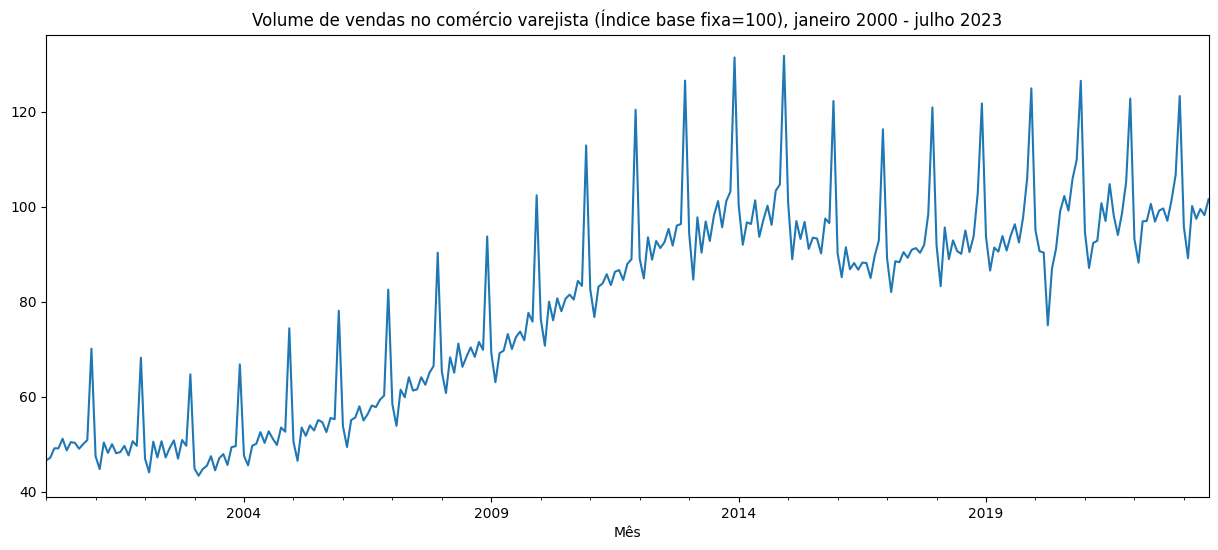

In [13]:
# Exibindo graficamente a série.

vendas_brasil_series.plot(title='Volume de vendas no comércio varejista (Índice base fixa=100), janeiro 2000 - julho 2023')
plt.show()

Realize uma análise e decomposição da série a partir dos passos definidos em a e b.

a. Roteiro 1:
1. Estimar tendência através de ajuste exponencial
2. Eliminar a tendência estimada
3. Estimar a sazonalidade através de médias móveis
4. Eliminar a sazonalidade
5. Analisar o resíduo para verificar se pertence a uma distribuição iid.

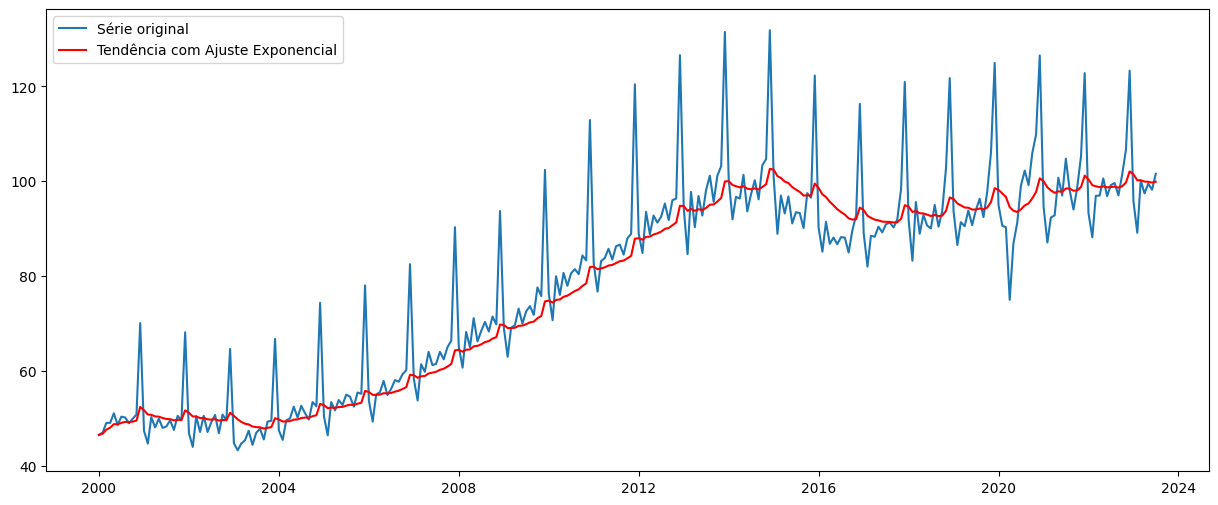

In [14]:
# 1. Estimando a tendência através de ajuste exponencial

exp_smooth =  vendas_brasil_series.ewm(alpha=0.1)
rolling_mean = exp_smooth.mean() # Tendência!!!
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(rolling_mean,color='red', label='Tendência com Ajuste Exponencial')
plt.legend(loc='best')
plt.show()

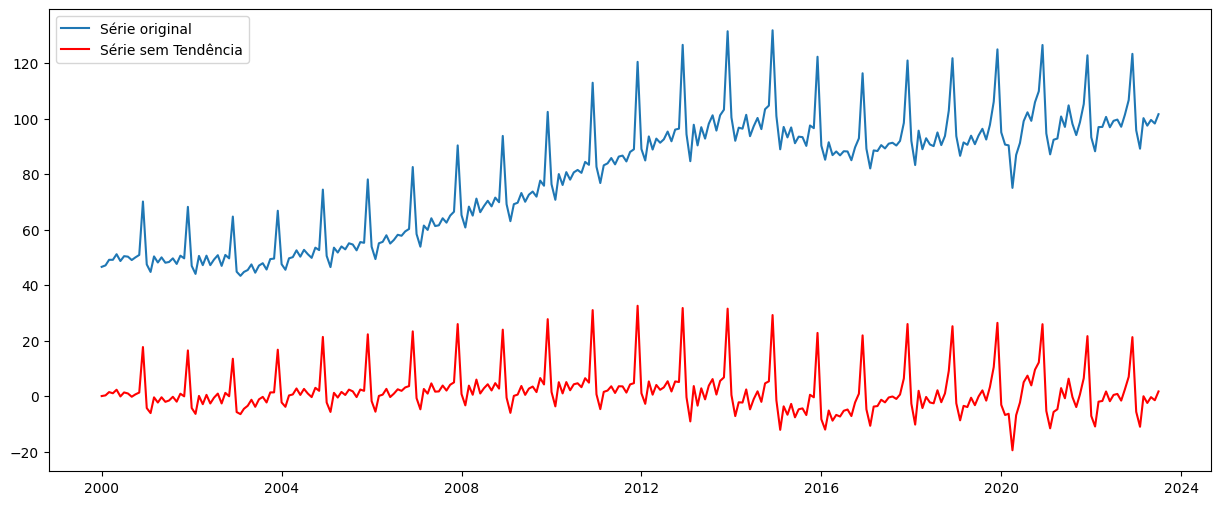

In [15]:
# 2. Eliminando a tendência estimada

sazonalidade_ruido = vendas_brasil_series - rolling_mean
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.legend(loc='best')
plt.show()

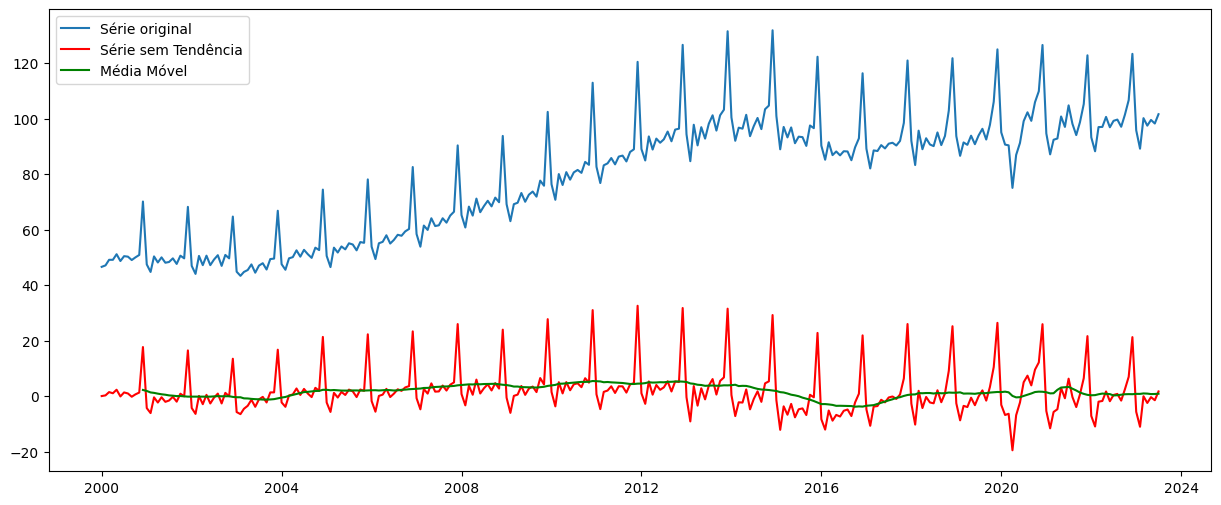

In [16]:
# 3. Estimando a sazonalidade através de médias móveis

media_movel = sazonalidade_ruido.rolling(window=12).mean()

plt.plot(vendas_brasil_series, label='Série original')
plt.plot(sazonalidade_ruido, color='red', label='Série sem Tendência')
plt.plot(media_movel, color='green', label='Média Móvel')
plt.legend(loc='best')
plt.show()

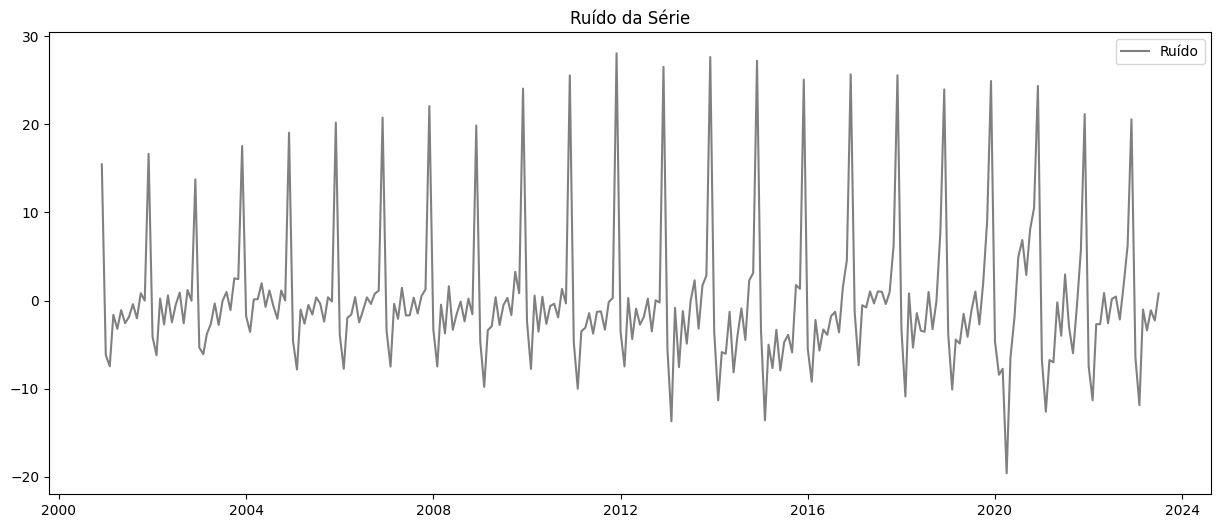

In [17]:
# 4. Eliminando a sazonalidade

ruido = sazonalidade_ruido - media_movel

plt.plot(ruido, label='Ruído', color='grey')
plt.title('Ruído da Série')
plt.legend(loc='best')
plt.show()

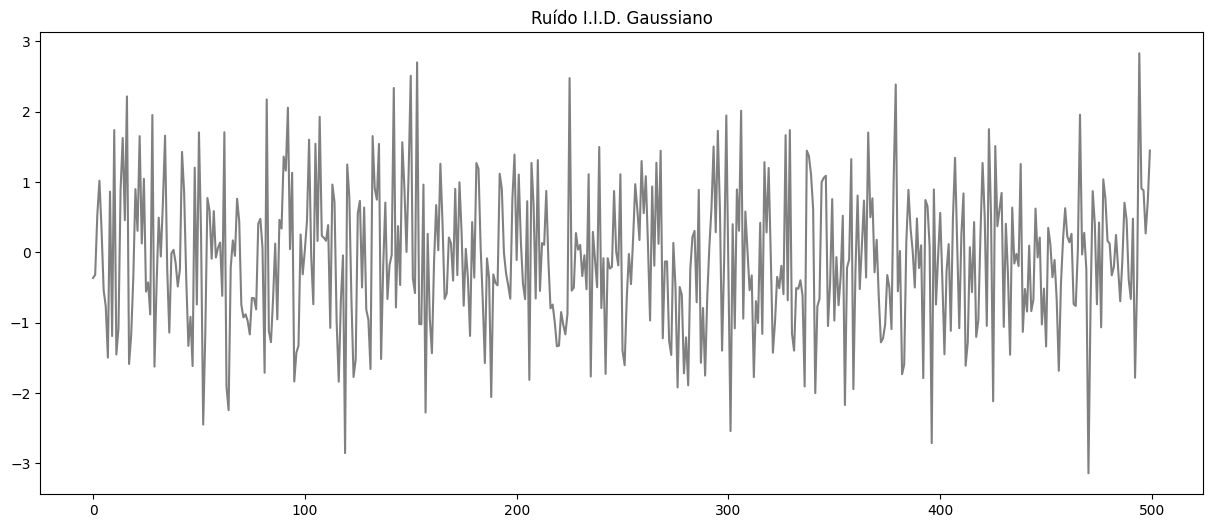

In [18]:
# 5. Analisando o resíduo para verificar se pertence a uma distribuição I.I.D.

# Série gerada por Ruído I.I.D Gaussiano
dados_iid = [gauss(0.0, 1.0) for i in range(500)]
serie_iid = pd.Series(dados_iid)
serie_iid.plot(title='Ruído I.I.D. Gaussiano', color='grey')
plt.show()

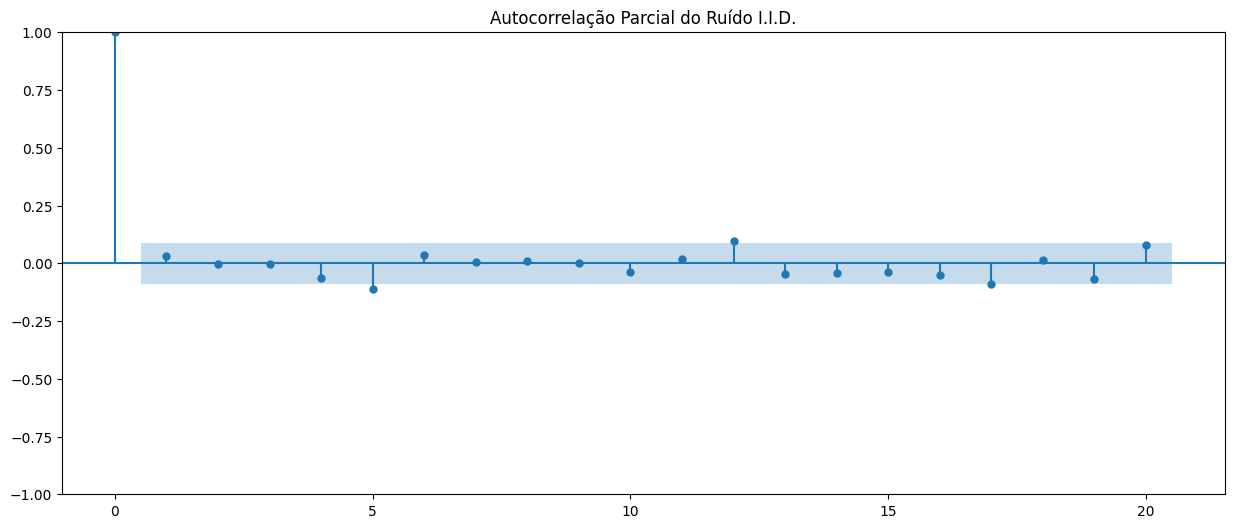

In [19]:
# Gerando o correlograma do ruído I.I.D.
 
smt.graphics.plot_pacf(serie_iid, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído I.I.D.")
plt.show()

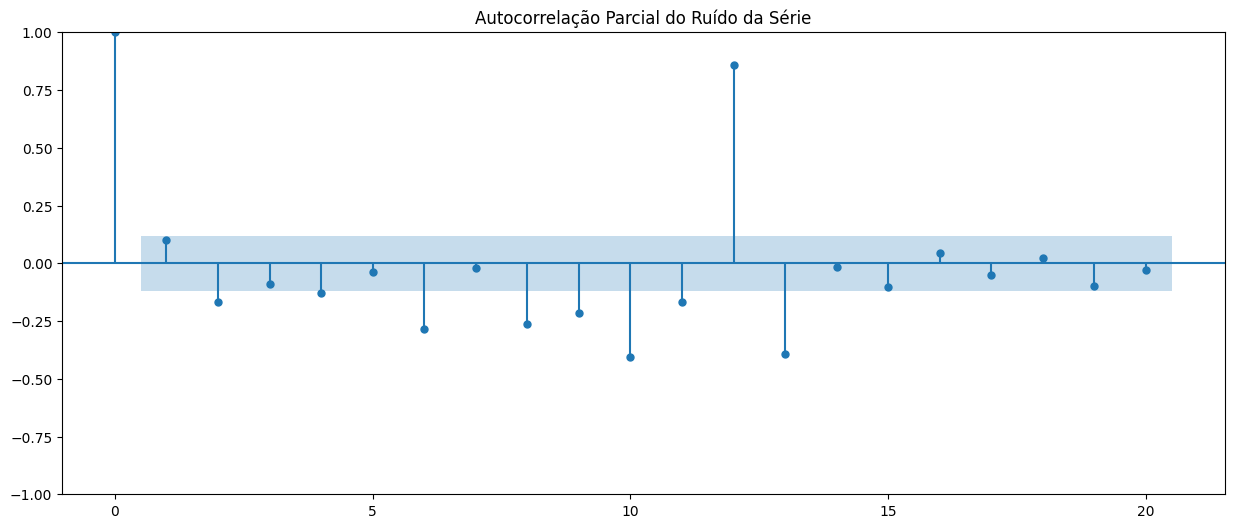

In [20]:
# Gerando o correlograma do ruído da série temporal em análise

ruido.dropna(inplace=True)
smt.graphics.plot_pacf(ruido, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído da Série")
plt.show()

*Nota*: Como muitos pontos de autocorrelação do ruído da série estão fora da zona em destaque (margem de 5%), não é possível afirmar que os dados do ruído da série têm uma distribuição I.I.D.

b. Roteiro 2:
1. Eliminar a tendência através de diferenciação
2. Eliminar a sazaonalidade através de diferenciação
3. Analisar o resíduo para verificar se pertence a uma distribuição iid.

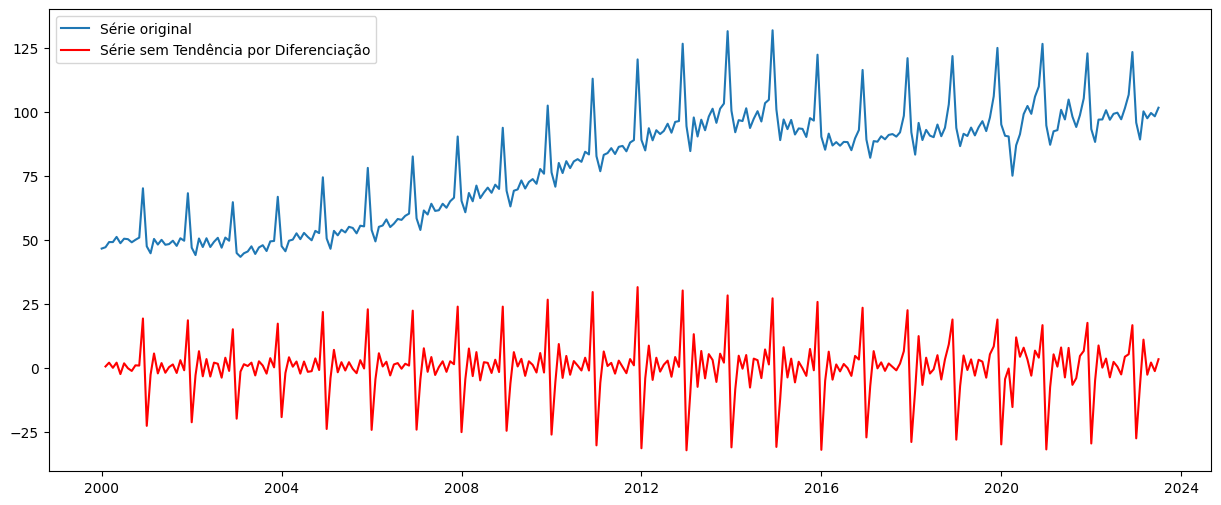

In [21]:
# 1. Eliminando a tendência através de diferenciação

vendas_ruido_sazonalidade = vendas_brasil_series - vendas_brasil_series.shift()
plt.plot(vendas_brasil_series, label='Série original')
plt.plot(vendas_ruido_sazonalidade,color='red', label='Série sem Tendência por Diferenciação')
plt.legend(loc='best')
plt.show()

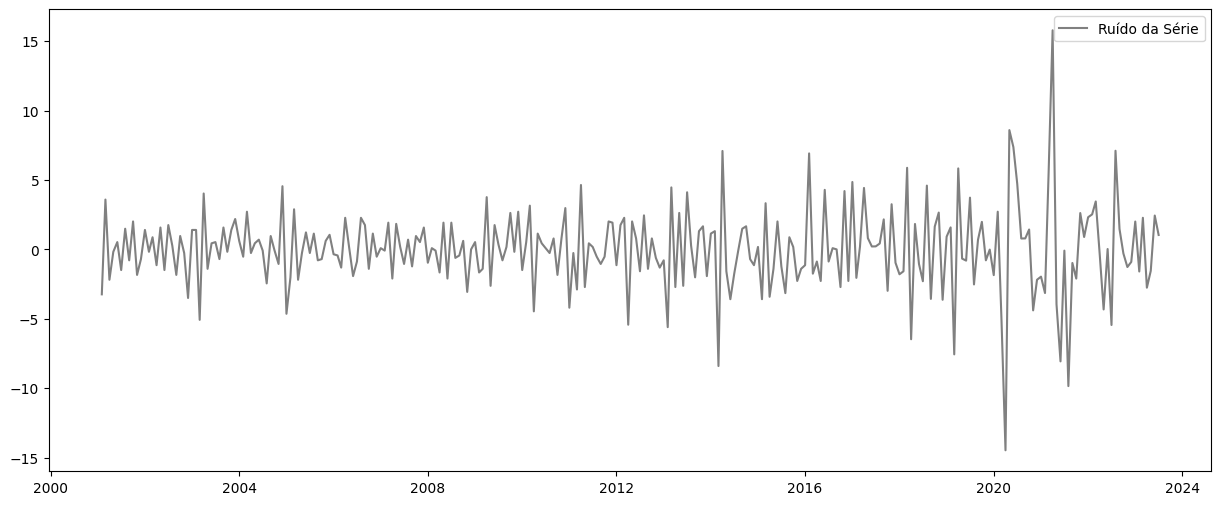

In [22]:
# 2. Eliminando a sazonalidade através de diferenciação

vendas_ruido = vendas_ruido_sazonalidade - vendas_ruido_sazonalidade.shift(periods=12)
plt.plot(vendas_ruido, label='Ruído da Série', color='grey')
plt.legend(loc='best')
plt.show()

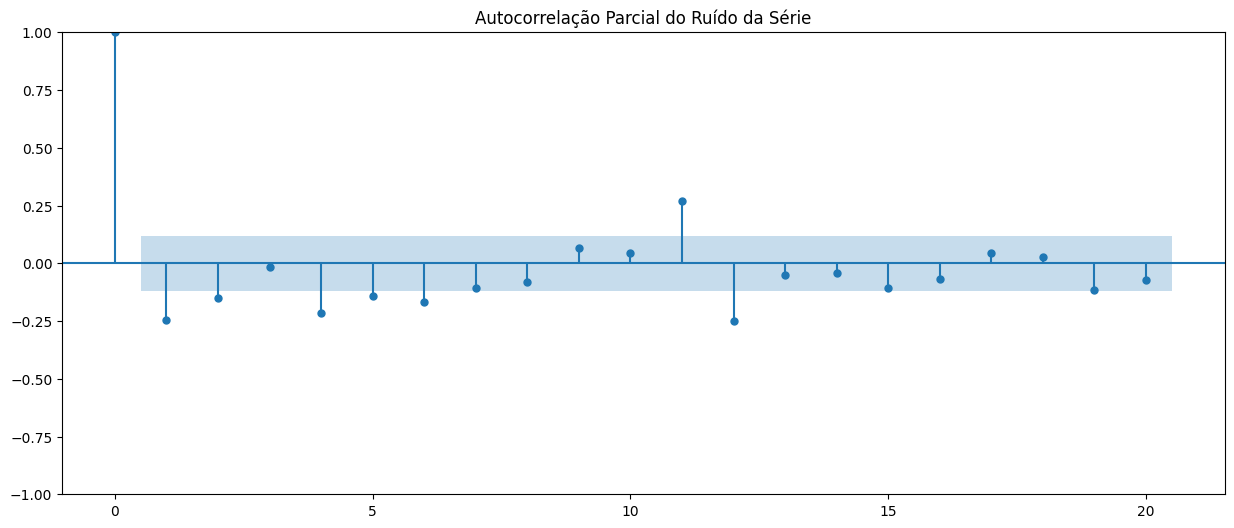

In [23]:
# 3. Analisando o resíduo para verificar se pertence a uma distribuição I.I.D.

# Gerando o correlograma do ruído da série temporal em análise

vendas_ruido.dropna(inplace=True)
smt.graphics.plot_pacf(vendas_ruido, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído da Série")
plt.show()

*Nota*: Muitos pontos da autocorrelação do ruído da série estão fora da zona em destaque (margem de 5%), portanto não é possível afirmar que os dados do ruído da série têm uma distribuição I.I.D.

A partir da análise das séries decompostas, avalie se algum dos modelos é adequado para representar a série.

2. Utilize novamente a série **vendas_brasil** para testar um mecanismo de previsão. Trata-se de um mecanismo mais simplificado, que terá como base a tendência estimada por uma regressão linear.

Realize os seguintes passos:
1. Estime a tendência utilizando regressão linear. Em Python, utilize a função fit() do módulo Linear Regression (http://www.statsmodels.org/stable/regression.html);
2. Estime a tendência com o valor estimado pela regressão linear;
3. Estime a sazonalidade através das médias móveis;
4. Elimine a sazonalidade;
5. Utilize a função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série;
6. Adicione a tendência estimada à sazonalidade;
7. Adicione ao resultado um ruído de média zero;
8. Compare em um mesmo gráfico a série original e a série prevista.

In [24]:
# 1. Estimando a tendência utilizando regressão linear

x1 = vendas_brasil['Mês']
y = vendas_brasil['Brasil']

s = pd.Series(y)
# s.head()
# print(f'{s.index}')

x = sm.add_constant(s.index)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Brasil   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     793.8
Date:                seg, 23 out 2023   Prob (F-statistic):           7.71e-84
Time:                        09:51:56   Log-Likelihood:                -1081.3
No. Observations:                 283   AIC:                             2167.
Df Residuals:                     281   BIC:                             2174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9393      1.314     35.717      0.000      44.352      49.526
x1             0.2272      0.008     28.174      0.000       0.211       0.243
==============================================================================
Omnibus:                       78.757   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.033
Skew:                           1.356   Prob(JB):                     3.61e-39
Kurtosis:                       5.768   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

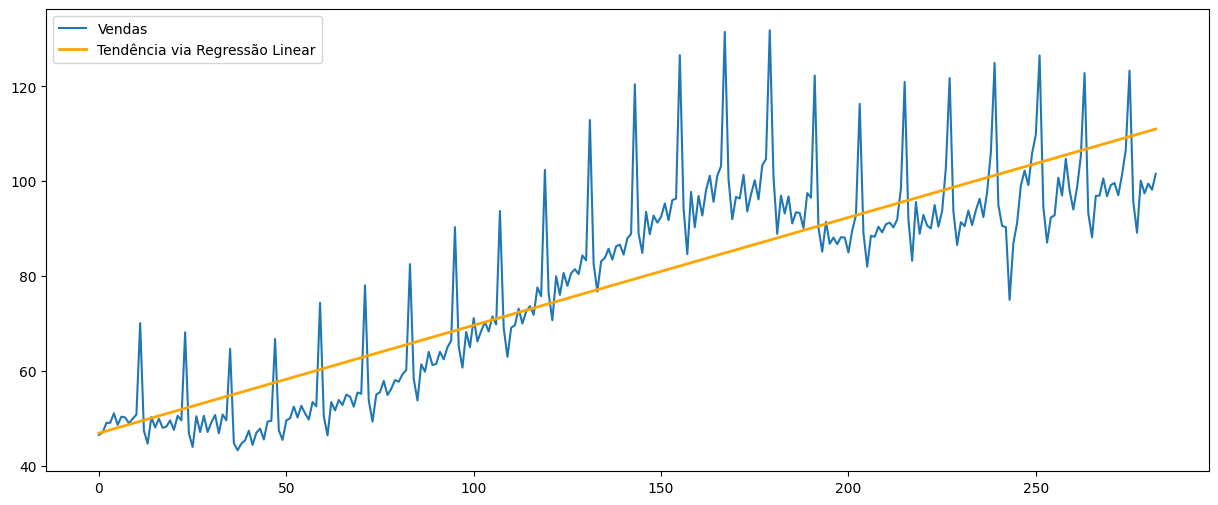

In [25]:
# Plotando a série e a tendência com o valor estimado pela regressão linear.

plt.plot(s.index, y, label='Vendas')
yhat = s.index * 0.2272 + 46.9393 # Estes coeficientes foram obtidos do relatório acima.
fig = plt.plot(s.index, yhat, lw=2, c='orange', label='Tendência via Regressão Linear')
plt.legend()
plt.show()

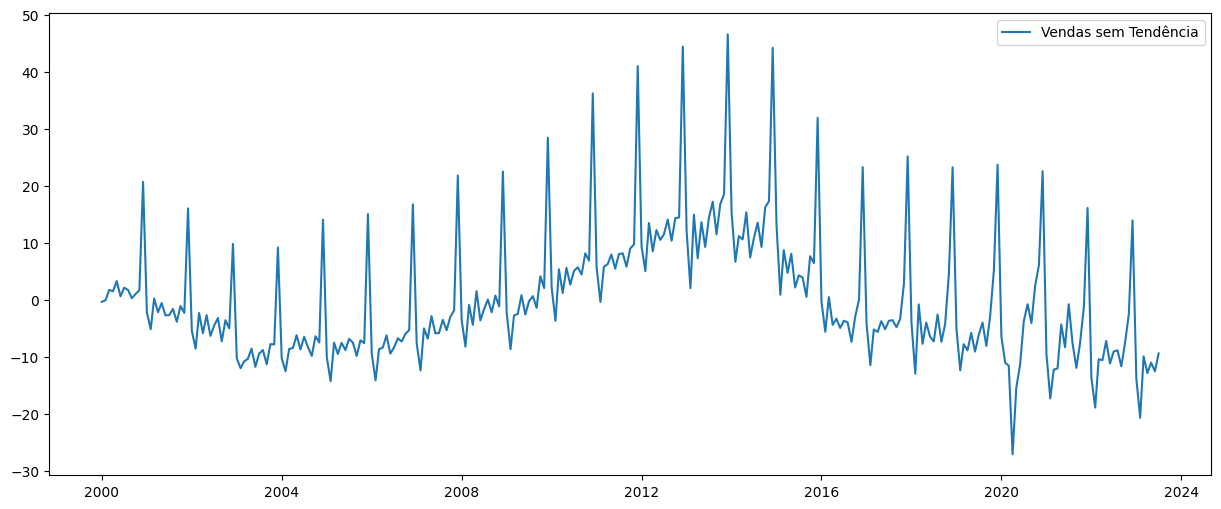

In [26]:
# 2. Eliminando a tendência com o valor estimado pela regressão linear

sazonalidade_ruido = y - yhat
plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.legend()
plt.show()

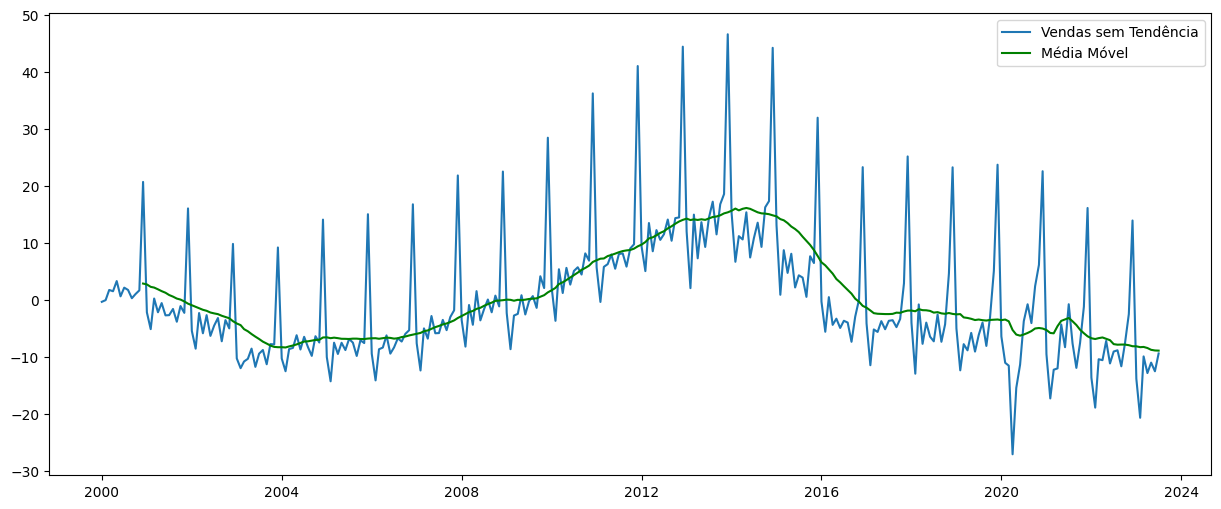

In [27]:
# 3. Estimando a sazonalidade através de médias móveis

media_movel = sazonalidade_ruido.rolling(window=12).mean()

plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.plot(x1, media_movel, color='green', label='Média Móvel')
plt.legend(loc='best')
plt.show()

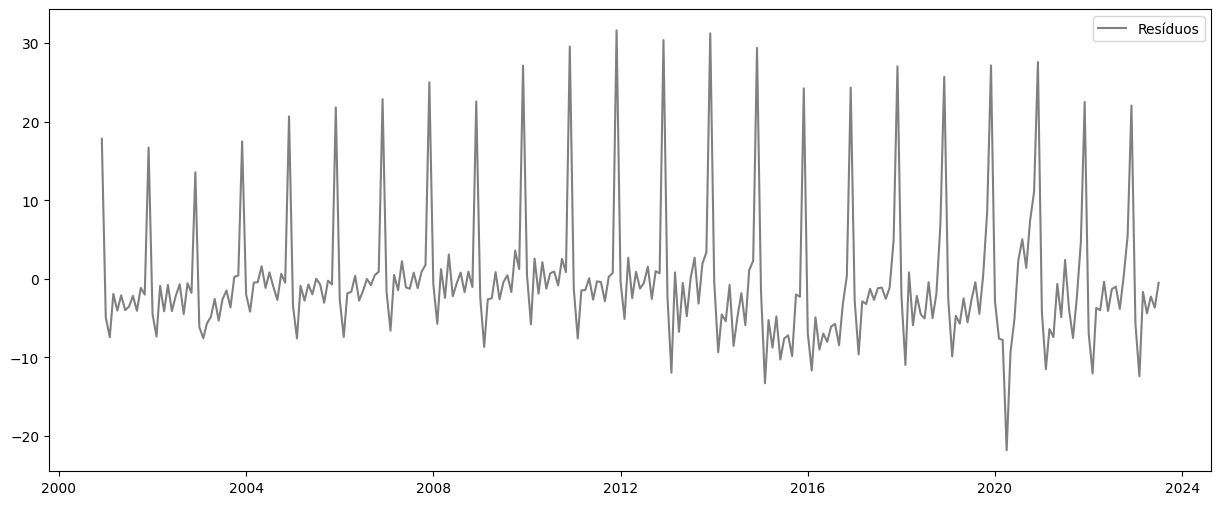

In [28]:
# 4. Eliminando a sazonalidade

ruido = sazonalidade_ruido - media_movel

#plt.plot(x1, sazonalidade_ruido, label='Vendas sem Tendência')
plt.plot(x1, ruido, color='grey', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [29]:
# 5. Utilizando ao função predict() do modelo de regressão linear para gerar a reta de tendência para todos os índices da série.

tendencia = results.predict(x)

print_model = results.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Brasil   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     793.8
Date:                seg, 23 out 2023   Prob (F-statistic):           7.71e-84
Time:                        09:51:58   Log-Likelihood:                -1081.3
No. Observations:                 283   AIC:                             2167.
Df Residuals:                     281   BIC:                             2174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9393      1.314     35.717      0.0

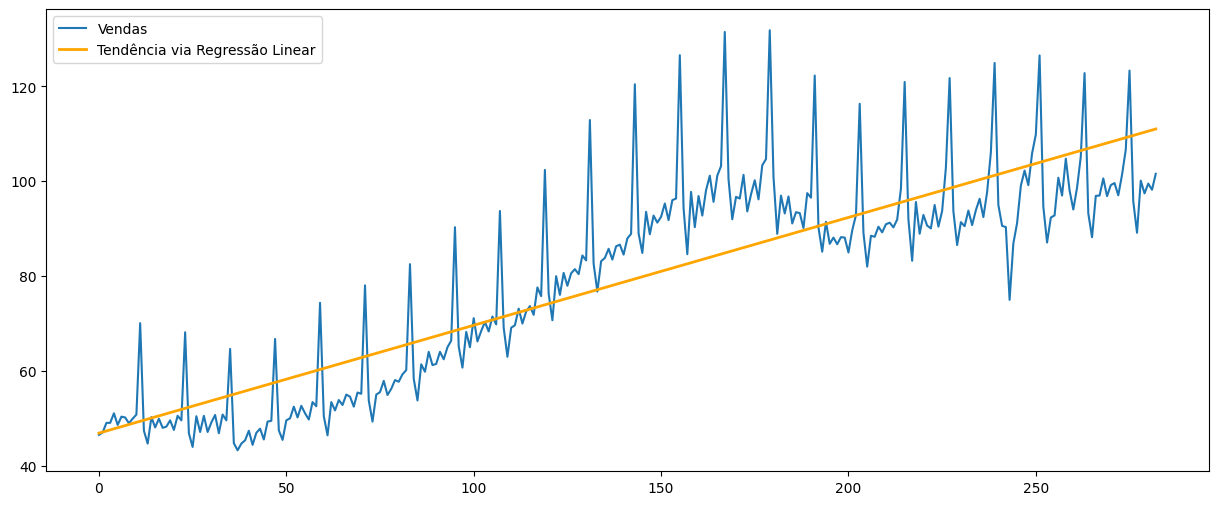

In [30]:
# Plotando a série original e a reta de tendência obtida com a função predict()

plt.plot(s.index, y, label='Vendas')
fig = plt.plot(s.index, tendencia, lw=2, c='orange', label='Tendência via Regressão Linear')
plt.legend()
plt.show()

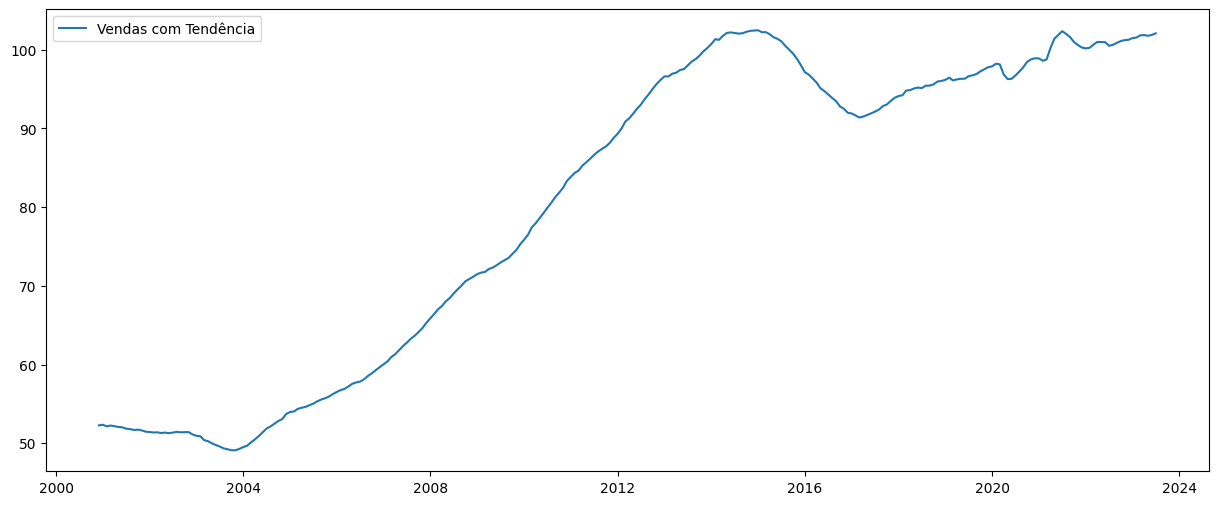

In [31]:
# 6. Adicionando a tendência estimada à sazonalidade

tendencia_sazonalidade = media_movel + tendencia

plt.plot(x1, tendencia_sazonalidade, label='Vendas com Tendência')
plt.legend(loc='best')
plt.show()

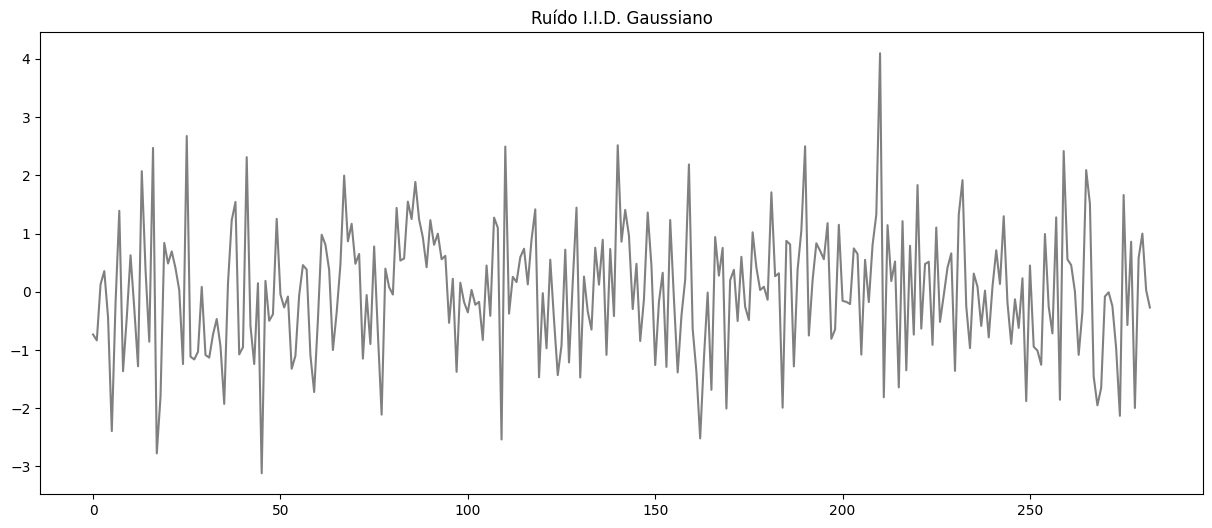

In [32]:
# 7. Adicionando um ruído branco de média zero.

# Série gerada por Ruído I.I.D Gaussiano
dados_iid = [gauss(0.0, 1.0) for i in range(283)]
serie_iid = pd.Series(dados_iid)
serie_iid.plot(title='Ruído I.I.D. Gaussiano', color='grey')
plt.show()

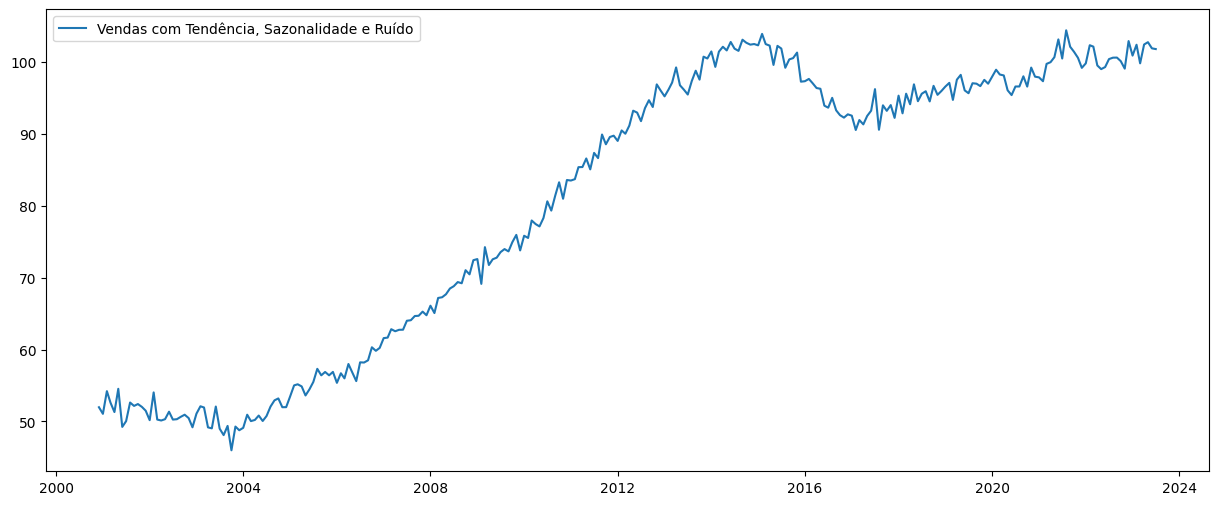

In [33]:
# Plotando o resultado da soma do ruído à sazonalidade
tendencia_sazonalidade_ruido = tendencia_sazonalidade + serie_iid
plt.plot(x1, tendencia_sazonalidade_ruido, label='Vendas com Tendência, Sazonalidade e Ruído')
plt.legend(loc='best')
plt.show()

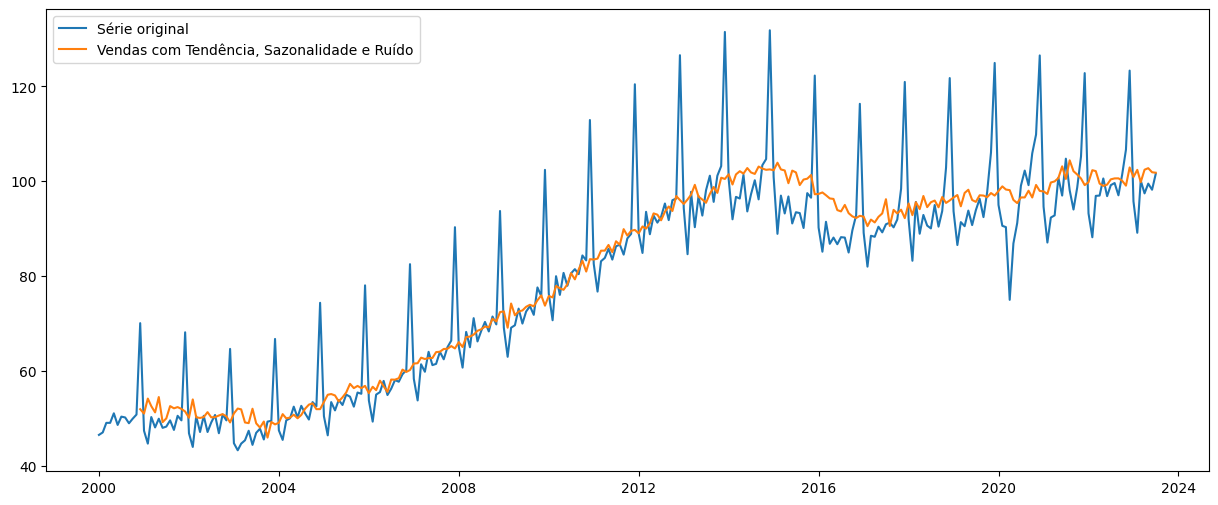

In [34]:
# 8. Comparando em um mesmo gráfico a série original e a série prevista.

plt.plot(x1, y, label='Série original')
plt.plot(x1, tendencia_sazonalidade_ruido, label='Vendas com Tendência, Sazonalidade e Ruído')
plt.legend(loc='best')
plt.show()